Regression model with sklearn

In [ ]:
# Load all the necessary libraries 
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the file
airport=pd.read_csv('/content/airport.csv')

In [ ]:
# Check the number of rows and columns 
airport.shape

(19, 13)

In [ ]:
# View the dataset
print(airport)

    year     dep     arr  dep_dem  ...  caputil  eff_dep  eff_arr   saer
0   2000  172170  158570   215157  ...    46.67    91.93    94.31  93.00
1   2001  147010  133806   176997  ...    42.79    93.41    95.48  94.34
2   2002  142779  129089   169072  ...    41.13    94.81    95.87  95.29
3   2003  140023  126800   168626  ...    41.59    94.26    94.73  94.47
4   2004  161351  160474   203993  ...    50.32    93.22    94.93  94.02
5   2005  176738  176139   249869  ...    54.73    91.55    93.92  92.63
6   2006  191852  191288   326131  ...    57.28    91.98    94.20  92.92
7   2007  222946  222505   407468  ...    62.42    90.42    91.82  91.05
8   2008  221203  221458   352677  ...    60.47    89.35    92.10  90.67
9   2009  209595  209710   312026  ...    57.35    89.91    92.47  91.14
10  2010  200902  200595   277480  ...    58.61    92.05    92.89  92.45
11  2011  205231  204685   266431  ...    56.99    91.84    92.76  92.30
12  2012  202430  202162   254435  ...    54.19    

In [ ]:
# Create a data frame
airport=pd.DataFrame(airport, columns=['caputil', 'dep'])
# Define X and Y
X=pd.DataFrame(airport['caputil'])
Y=pd.DataFrame(airport['dep'])

In [ ]:
# Define the model
reg = LinearRegression()

In [ ]:
# Determine three folds
scores=[]
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
# Create the iteration for the three folds
for i, (train, test) in enumerate(kfold.split(X, Y)):
    reg.fit(X.iloc[train,:], Y.iloc[train,:])
    score = reg.score(X.iloc[test,:], Y.iloc[test,:])
    scores.append(score)
print(scores)

[0.9029142706220207, 0.9048352664783202, 0.5119143545760048]


In [ ]:
# Determine the coefficient of determination with sklearn
reg = LinearRegression().fit(X, Y)
print('Coefficient of Determination:', reg.score(X, Y))

Coefficient of Determination: 0.8897612752328165


In [ ]:
# Determine the coefficient for X
print('Coefficients:', reg.coef_)

Coefficients: [[4202.71508638]]


In [ ]:
# Determine the intercept
print('Intercept:', reg.intercept_)

Intercept: [-33354.0929305]


In [ ]:
# Predict the Y values
Y_pred=reg.predict(Y)

In [ ]:
# Determine the values
print('Predicted Values: ',Y_pred)

Predicted Values:  [[7.23548102e+08]
 [6.17807791e+08]
 [6.00026103e+08]
 [5.88443420e+08]
 [6.78078928e+08]
 [7.42746105e+08]
 [8.06265941e+08]
 [9.36945164e+08]
 [9.29619831e+08]
 [8.80834714e+08]
 [8.44300512e+08]
 [8.62494066e+08]
 [8.50722261e+08]
 [8.56471575e+08]
 [8.95619866e+08]
 [9.25076696e+08]
 [9.49734026e+08]
 [9.37701652e+08]
 [9.55769124e+08]]


In [ ]:
# Visualize predicted errors
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(reg, X, Y, cv=10)

In [ ]:
# Determine the predicted errors
print('Predicted Errors: ', predicted)

Predicted Errors:  [[160835.55508042]
 [143928.21704009]
 [138393.80845549]
 [140358.20860634]
 [180662.82450213]
 [198806.56295092]
 [209181.70395083]
 [231558.86084681]
 [220561.15973044]
 [207488.73277439]
 [214087.71393934]
 [207154.97715331]
 [193506.03241906]
 [195900.52219425]
 [204795.19251424]
 [215536.69965656]
 [210137.99688364]
 [214613.01298902]
 [216056.74708452]]


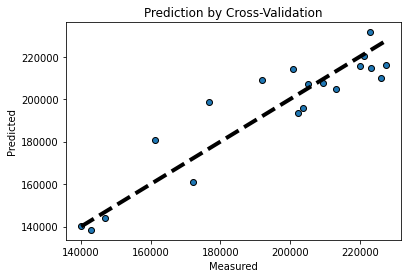

In [ ]:
# Create a graph of the predicted versus cross-validated errors
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction by Cross-Validation', fontdict=None, loc='center', pad=None)
plt.show()

Regression Model with statsmodels

In [ ]:
# Method 2 Using Statsmodels
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Add a constant
X2 = sm.add_constant(X) 
# Define the model
est = sm.OLS(Y, X2)
# Fit the model
est2 = est.fit()
print("summary()\n",est2.summary())
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)

summary()
                             OLS Regression Results                            
Dep. Variable:                    dep   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           1.45e-09
Time:                        16:34:20   Log-Likelihood:                -201.11
No. Observations:                  19   AIC:                             406.2
Df Residuals:                      17   BIC:                             408.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.335e+04   1.96e+04     -1.6

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [ ]:
# Determine predicted values and R-squared with scikitlearn
from sklearn.metrics import r2_score
predictions = est2.predict(X2)

print(est2.predict(X2))

print("r2_score",r2_score(Y,predictions))

0     162786.620151
1     146480.085616
2     139503.578572
3     141436.827512
4     178126.530216
5     196660.503747
6     207377.427217
7     228979.382761
8     220784.088343
9     207671.617273
10    212967.038282
11    206158.639842
12    194391.037600
13    196786.585199
14    205612.286881
15    216497.318955
16    211958.386661
17    216581.373256
18    217043.671916
dtype: float64
r2_score 0.8897612752328165


How to create a dummy variable with sklearn

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_table('http://data.princeton.edu/wws509/datasets/salary.dat', delim_whitespace=True)
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [ ]:
# To create a dummy variable
dummy=pd.get_dummies(df['sx'])
dummy.head()

,female,male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [ ]:
# To merge the dataframes
df.merge(dummy, left_index=True, right_index=True)
df.head()

,sx,rk,yr,dg,yd,sl,female,male
0,male,full,25,doctorate,35,36350,0,1
1,male,full,13,doctorate,22,35350,0,1
2,male,full,10,doctorate,23,28200,0,1
3,female,full,7,doctorate,27,26775,1,0
4,male,full,19,masters,30,33696,0,1


In [ ]:
# To concatenate on column 1
df=pd.concat([df, dummy], axis=1)
df.head()

,sx,rk,yr,dg,yd,sl,female,male
0,male,full,25,doctorate,35,36350,0,1
1,male,full,13,doctorate,22,35350,0,1
2,male,full,10,doctorate,23,28200,0,1
3,female,full,7,doctorate,27,26775,1,0
4,male,full,19,masters,30,33696,0,1


In [ ]:
import pandas as pd
df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)# copy data and separate predictors and response
X = df.copy()
y = X.pop('chd')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
# compute percentage of chronic heart disease for famhist
y.groupby(X.famhist).mean()

famhist
Absent     0.237037
Present    0.500000
Name: chd, dtype: float64

Creating a dummy variable with statsmodels

In [ ]:
import statsmodels.formula.api as smf
# encode df.famhist as a numeric via pd.Factor
est = smf.ols(formula="sbp ~ age+ obesity+adiposity+C(famhist)", data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sbp   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     24.04
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           4.55e-18
Time:                        11:52:36   Log-Likelihood:                -2006.3
No. Observations:                 462   AIC:                             4023.
Df Residuals:                     457   BIC:                             4043.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               104.7562      6.167     16.985      0.000      92.636     116.876
C(famhist)[T.Present]    -0.6380      1.822     -0.350      0.726      -4.218       2.942
age                       0.4072      0.081      5.028      0.000       0.248       0.566
obesity                   0.2788      0.310      0.900      0.368      -0.330       0.888
adiposity                 0.3596      0.206      1.749      0.081      -0.045       0.764
==============================================================================
Omnibus:                       78.787   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.851
Skew:                           0.989   Prob(JB):                     2.60e-31
Kurtosis:                       4.846   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""